# Problem Set 7 - Liam Seper

In [1]:
import numpy as np
import matplotlib.pyplot as pp
import scipy.integrate as scint
import scipy.stats as stats
import math

REG_ROUND = 4
SPEC_ROUND = 6

### Question 1

Expected Value of Y: 3
Variance of Y: 16


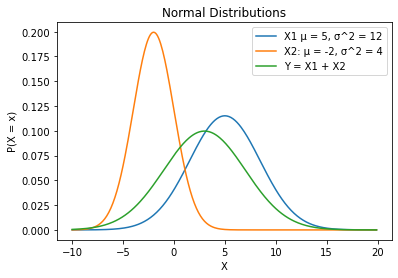

In [2]:
x1Mean = 5
x1Var = 12
x2Mean = -2
x2Var = 4

yMean = x1Mean + x2Mean
yVar = x1Var + x2Var

print(f'Expected Value of Y: {yMean}')
print(f'Variance of Y: {yVar}')

xVals = np.arange(-10, 20, 0.1)
pp.plot(xVals, stats.norm.pdf(xVals, x1Mean, math.sqrt(x1Var)), label="X1 μ = 5, σ^2 = 12")
pp.plot(xVals, stats.norm.pdf(xVals, x2Mean, math.sqrt(x2Var)), label="X2: μ = -2, σ^2 = 4")
pp.plot(xVals, stats.norm.pdf(xVals, yMean, math.sqrt(yVar)), label="Y = X1 + X2")
pp.legend()
pp.xlabel('X')
pp.ylabel('P(X = x)')
pp.title("Normal Distributions")
pp.show()

Looking at the graph, it seems like the means were simply added. The variances only got larger, as adding any (nonnegative) number to another would only increase it, and seem to flatten the curve moreso, as the values are now more spread out.

### Question 2

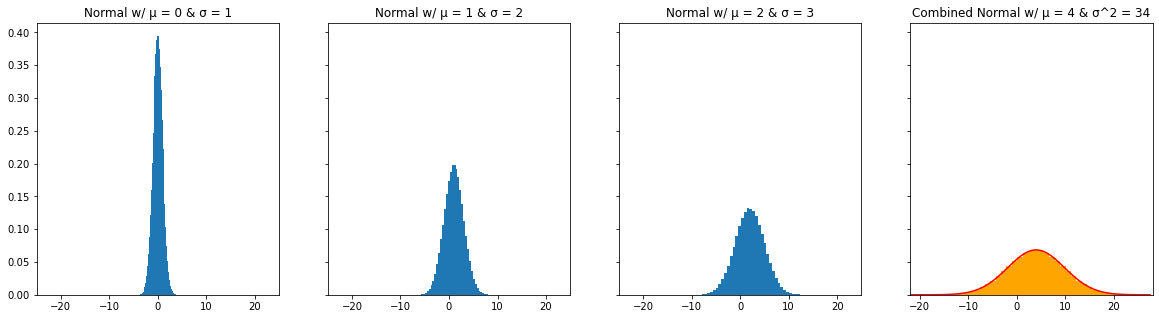

Actual Mean: 4
Actual Variance: 34
Measured Mean: 3.9934
Measured Variance: 34.042061


In [3]:
aVals = [3, 2, 1]
meanVals = [0, 1, 2]
sigmaVals = [1, 2, 3]

RUNS = 1000000

np.random.seed(101)

meanSum = 0
sigSum = 0
xYVals = []
for i in range(3):
    xYVals.append(np.random.normal(meanVals[i], sigmaVals[i], RUNS))
    meanSum += aVals[i] * meanVals[i]
    sigSum += (aVals[i] ** 2) * (sigmaVals[i] ** 2)    

x = np.arange(-22, 28, .5)
y = stats.norm.pdf(x, meanSum, math.sqrt(sigSum))

randXVals = np.arange(-5, 40, 0.1)
fig, axes = pp.subplots(1, 4, sharey=True, figsize=(20, 5))
for i in range(len(xYVals)):
    axes[i].hist(xYVals[i], 50, density=True)
    axes[i].set_title(f"Normal w/ μ = {meanVals[i]} & σ = {sigmaVals[i]}")
    axes[i].set_xlim(-25, 25)

yVals = np.random.normal(meanSum, math.sqrt(sigSum), RUNS)
axes[3].hist(yVals, 50, density = True, color='orange')
axes[3].plot(x, y, color='red')
axes[3].set_xlim(-22, 28)
axes[3].set_title(f"Combined Normal w/ μ = {meanSum} & σ^2 = {round(sigSum, SPEC_ROUND)}")
pp.show()

print(f'Actual Mean: {meanSum}')
print(f'Actual Variance: {sigSum}')
print(f'Measured Mean: {round(np.mean(yVals), REG_ROUND)}')
print(f'Measured Variance: {round(np.var(yVals), SPEC_ROUND)}')

This shows that as you sample more and more from a combined distribution, the resulting graph will resemble a combined distribution.

### Question 3

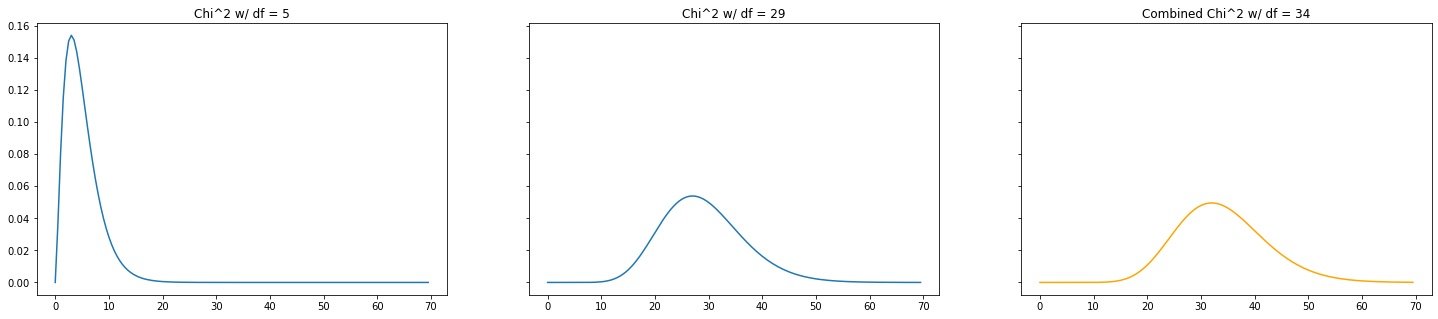

Expected Value of Y: 34
Variance of Y: 68


In [4]:
degs = [5, 29]

mean = sum(degs)
var = 2 * mean

fig, axes = pp.subplots(1, 3, sharey = True, figsize=(25, 5))

x = np.arange(0, 70, 0.5)
for i in range(len(axes) - 1):
    chi2Y = stats.chi2.pdf(x, degs[i])
    axes[i].plot(x, chi2Y)
    axes[i].set_title(f"Chi^2 w/ df = {degs[i]}")

chi2Y = stats.chi2.pdf(x, sum(degs))
axes[2].plot(x, chi2Y, color='orange')
axes[2].set_title(f"Combined Chi^2 w/ df = {sum(degs)}")
pp.show()

print(f'Expected Value of Y: {mean}')
print(f'Variance of Y: {var}')

Y seems to be nearly identical to X2, and this is probably because the degree of freedom difference is much less from X2 to Y than it is from X1 to Y, so they resemble each other much more so.

### Question 4

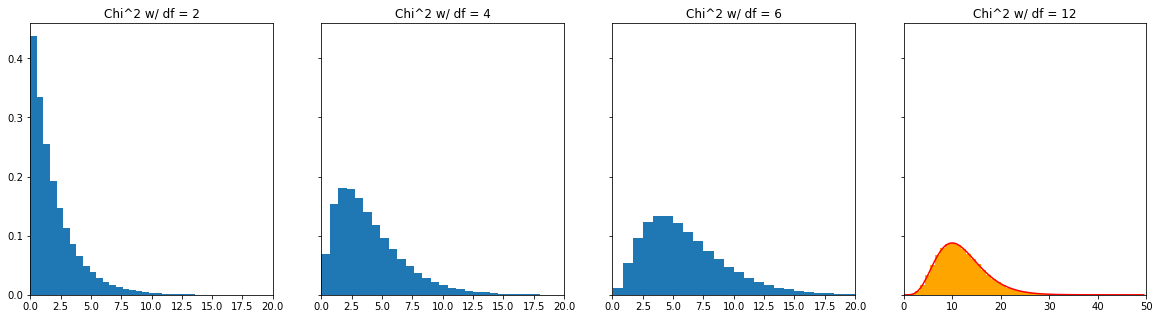

Actual Mean: 12
Actual Variance: 24
Measured Mean: 11.9955
Measured Variance: 24.008907


In [5]:
np.random.seed(101)

n = 3
df = [2, 4, 6]
RUNS = 1000000

yDF = sum(df)

fig, axes = pp.subplots(1,4, sharey=True, figsize=(20,5))
for i in range(len(df)):
    axes[i].hist(np.random.chisquare(df[i], RUNS), 50, density=True)
    axes[i].set_title(f"Chi^2 w/ df = {df[i]}")
    axes[i].set_xlim(0, 20)

x = np.arange(0, 50, 0.5)
chi2Y = stats.chi2.pdf(x, yDF)

yVals = np.random.chisquare(yDF, RUNS)
axes[3].hist(yVals, 50, density=True, color='orange')
axes[3].plot(x, chi2Y, color='red')
axes[3].set_title(f"Chi^2 w/ df = {yDF}")
axes[3].set_xlim(0, 50)
pp.show()

print(f'Actual Mean: {yDF}')
print(f'Actual Variance: {yDF * 2}')
print(f'Measured Mean: {round(np.mean(yVals), REG_ROUND)}')
print(f'Measured Variance: {round(np.var(yVals), SPEC_ROUND)}')

The combined distribution appears to be a chi-squared distribution with 12 degrees of freedom.

### Question 5

Y Expected Value: 4.0135
Y Variance: 8.055342


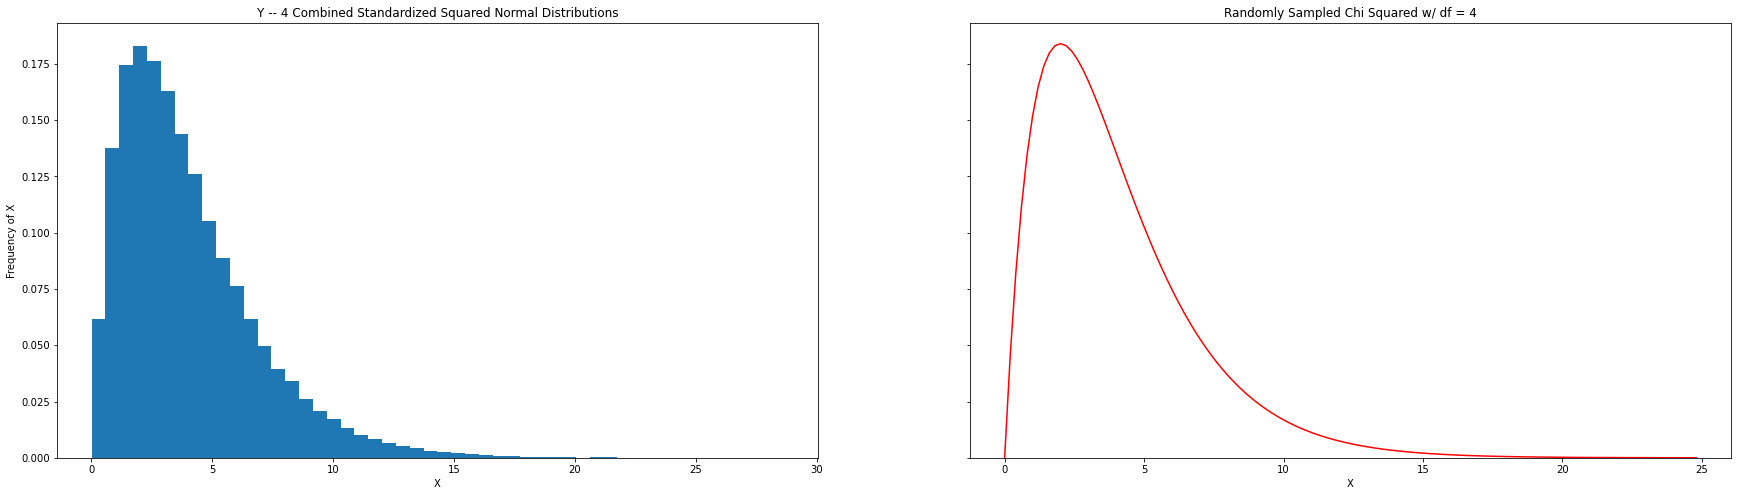

In [7]:
np.random.seed(101)

mean = 2
var = 3

RUNS = 100000

def standardize(x):
    return ((x - mean) / math.sqrt(var)) ** 2

y = np.empty(RUNS)
for i in range(4):
    raw = np.random.normal(mean, math.sqrt(var), RUNS)
    y = y + np.array([standardize(x) for x in raw])

print(f'Y Expected Value: {round(np.mean(y), REG_ROUND)}')
print(f'Y Variance: {round(np.var(y), SPEC_ROUND)}')

fig, axes = pp.subplots(1, 2, sharey=True, figsize=(30, 8))

axes[0].hist(y, 50, density=True)
axes[0].set_title('Y -- 4 Combined Standardized Squared Normal Distributions')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Frequency of X')

chi2 = stats.chi2(4).pdf
x = np.arange(0, 25, 0.2)
axes[1].plot(x, chi2(x), color='red')
axes[1].set_title('Randomly Sampled Chi Squared w/ df = 4')
axes[1].set_xlabel('X')

pp.show()

The two graphs look nearly identical. This happens because a standardized normal distribution squared yields only positive values, and since there are more values near 0 than not in a normal distribution, we see the peak closer to zero.

### Question 6

In [ ]:
np.random.seed(101)

lambdas = [5, 9]
RUNS = 1000000

yLamba = sum(lambdas)

print(f'Y Expected Value: {yLamba}')
print(f'Y Variance: {yLamba}')

fig, axes = pp.subplots(1, 3, sharey=True, figsize=(25, 5))

data = np.random.poisson(lambdas[0], RUNS)
axes[0].hist(data, 20, density=True)
axes[0].set_title(f'Poisson λ = {lambdas[0]}')
axes[0].set_xlabel('X')
axes[0].set_xlim([0, 30])

data = np.random.poisson(lambdas[1], RUNS)
axes[1].hist(data, 28, density=True)
axes[1].set_title(f'Poisson λ = {lambdas[1]}')
axes[1].set_xlabel('X')
axes[1].set_xlim([0, 30])


yData = np.random.poisson(yLamba, RUNS)
axes[2].hist(yData, 35, density=True, color='orange')
axes[2].set_title(f'Combined Poisson')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Frequency of X')
axes[2].set_xlim([0, 30])
pp.show()

The combined distribution again seems to emulate the poisson distribution with a lambda of 9 more closely than the poisson distribution with the lambda of 5. This is because the lambda for the combined one is 14, which closer to 9 than 5.